# Data Science

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statistics

In [45]:
#read the data in
data = pd.read_csv("2020-XTern-DS.csv")
data.head(10)

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes
5,ID_5221,39.370441,-85.739516,"South Indian, North Indian, Chinese",$15.00,$50.00,3.8,46,18,30 minutes
6,ID_3777,39.821806,-85.005577,"Beverages, Fast Food",$15.00,$50.00,3.7,108,31,30 minutes
7,ID_745,39.280324,-85.144363,"Chinese, Thai, Asian",$65.00,$50.00,4.0,1731,1235,45 minutes
8,ID_2970,39.268816,-85.602168,"Mithai, Street Food",$10.00,$50.00,3.9,110,26,30 minutes
9,ID_3474,39.874521,-85.439963,"Fast Food, North Indian, Rolls, Chinese, Momos...",$20.00,$50.00,3.9,562,294,65 minutes


# Determine where to have the 10 pick up points
I will do this by clustering the latitude and longitude

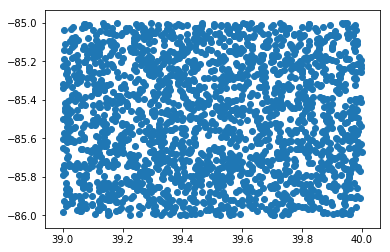

In [3]:
X = list(data.iloc[:,1])
Y = list(data.iloc[:,2])
plt.scatter(X,Y)

In [4]:
#select the position to cluster
position = data[["Latitude","Longitude"]]
#position

In [5]:
scaled_position = StandardScaler().fit_transform(position)

In [6]:
#kMeans clustering using sklearn
kMeans = KMeans(n_clusters = 10)
model = kMeans.fit(scaled_position)
centers = model.cluster_centers_
centers

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [8]:
#transforming the centers back to lat and long
meanLat = sum(list(position.iloc[:,0]))/len(position)
meanLong = sum(list(position.iloc[:,1]))/len(position)
sdLat = statistics.stdev(list(position.iloc[:,0]))
sdLong = statistics.stdev(list(position.iloc[:,1]))
for row in centers:
    row[0] = meanLat + sdLat*row[0]
    row[1] = meanLong + sdLong*row[1]

centers

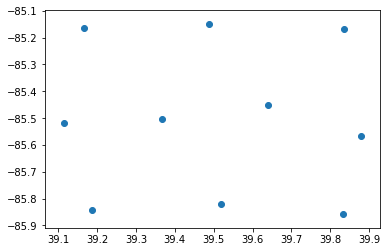

In [10]:
plt.scatter(centers[:,0],centers[:,1])

# Find budget options
Budget options are restaurants whose average cost is less than $12. This does include beverage and desert only restaurants

In [11]:
#filtering for average
avgCost = data.iloc[:,4].copy()
for i in range(len(avgCost)):
    avgCost.iloc[i] = float(avgCost.iloc[i].replace('$','').replace(',',''))

budget = data[avgCost<12.00]

In [30]:
#budget is restaurants with average cost under $12
budget.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
8,ID_2970,39.268816,-85.602168,"Mithai, Street Food",$10.00,$50.00,3.9,110,26,30 minutes
13,ID_354,39.691918,-85.441037,Beverages,$5.00,$0.00,3.8,184,128,45 minutes
14,ID_6891,39.656718,-85.588766,Fast Food,$10.00,$50.00,3.5,23,5,30 minutes
15,ID_6406,39.977283,-85.093808,"Biryani, Mughlai",$10.00,$50.00,3.6,353,53,30 minutes


# Find trending restaurants
Trending restaurants are restaurants whose rating z-score plus vote z-score is greater than 2

In [13]:
#all new restaurants
newRestaurants = data[data.iloc[:,6]=='NEW']
voteData = data[data.iloc[:,7] != '-']

In [32]:
Rating = [float(i) for i in list(voteData.iloc[:,6])] 
Votes = [float(i) for i in list(voteData.iloc[:,7])] 

meanRating = statistics.mean(Rating)
meanVote = statistics.mean(Votes)
sdRating = statistics.stdev(Rating)
sdVote = statistics.stdev(Votes)

#trending is the sum of the Z scores for Rating and Votes
trendingScore = []

for r in range(len(Rating)):
    trendingScore.append((Rating[r]-meanRating)/sdRating+(Votes[r]-meanVote)/sdVote)

In [57]:
trending = voteData[np.array(trendingScore)>2]
trending.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
7,ID_745,39.280324,-85.144363,"Chinese, Thai, Asian",$65.00,$50.00,4.0,1731,1235,45 minutes
11,ID_1696,39.397138,-85.135300,"Chinese, Thai, Indonesian, Italian",$80.00,$50.00,4.2,1693,1239,45 minutes
35,ID_1160,39.246289,-85.152915,"Asian, Burmese, Bubble Tea, Desserts, Salad, T...",$60.00,$50.00,4.7,914,499,45 minutes
40,ID_5285,39.010010,-85.863897,"Mughlai, North Indian",$20.00,$50.00,4.0,1408,851,45 minutes
41,ID_7544,39.491981,-85.742358,"Desserts, Beverages",$15.00,$50.00,4.1,806,513,45 minutes


In [38]:
from scipy.stats import pearsonr


In [55]:
#correlating cook time and waiting
Reviews = []
for i in voteData.iloc[:,9]:
    Reviews.append(float(i.replace(" minutes","")))

corr = pearsonr(np.array(Rating), np.array(Reviews))[0]
corr

0.1334516759504337

# Does Chinese cost more than Italian?

In [82]:
chinese = []
for row in data.iloc[:,3]:
    chinese.append("Chinese" in row.split(", "))

chinese = data[np.array(chinese)]

italian = []
for row in data.iloc[:,3]:
    italian.append("Italian" in row.split(", "))

italian = data[np.array(italian)]

In [96]:
def avgCost(df):
    avg = df.iloc[:,4].copy()
    for i in range(len(avg)):
        avg.iloc[i] = float(avg.iloc[i].replace('$','').replace(',',''))
    return avg

costItalian = avgCost(italian)
costChinese = avgCost(chinese)


In [95]:
#this is not small enough to pool the stdev
#The critical value for the F-test is 1.27879246
print(costItalian.std()**2/costChinese.std()**2)

2.204568091216056


In [102]:
#conducting 2 sample t test without pooling
s1 = costItalian.std()
s2 = costChinese.std()
n1 = len(costItalian)
n2 = len(costChinese)
t = abs(costItalian.mean()-costChinese.mean())/(s1**2/n1+s2**2/n2)**.5
df = (s1**2/n1+s2**2/n2)**2/((s1**2/n1)**2/(n1-1)+(s2**2/n2)**2/(n2-1))
print(df)
print(t)

137.5074077762115
7.24714200273566


<p>The critical value with df = 137 is 1.9774 which is much less than 7.24</p>
We have strong enough evidence to conclude that the cost of italian food is significantly more than the cost of chinese food.